In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [372]:
class Point:
  def __init__(self):
    self.x = None
    self.y = None
    self.classId = None

  def __init__(self, x: int, y: int, classId=None):
    self.x = x
    self.y = y
    self.classId = classId

  def dist(self, other):
    dx, dy = self.x - other.x, self.y - other.y
    return sqrt(dx * dx + dy * dy)

In [373]:
def classifier(p: Point, points: list, k: int, classCount: int):
  leaders = []
  for i in range(len(points)):
    leaders.append((i, p.dist(points[i])))
  top = sorted(leaders, key=lambda x: x[1])[:k]
  classes = {}
  for top_i in top:
    class_i = points[top_i[0]].classId
    if class_i in classes.keys():
      classes[class_i] += 1
    else:
      classes[class_i] = 1
  max_count = max(classes.values())
  lead_classes = []
  for key, val in classes.items():
    if val == max_count:
      lead_classes.append(key)
  return lead_classes[0] if len(lead_classes) == 1 else classCount

In [374]:
# params

In [375]:
nameX = 'MMRCurrentRetailAveragePrice'
nameY = 'VehOdo'
nameZ = 'IsBadBuy'
k = 1

In [376]:
data = pd.read_csv('data.csv')
data.fillna(data.mean(), inplace=True)

In [377]:
data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.509847,14578.913128,2461.689142,2722.156232,3155.896033,3385.371986,2429.308083,2680.445479,3084.025786,3303.102877,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5407.000000,6281.000000,7494.000000,4285.000000,5425.000000,6550.000000,7796.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.494299,73361.000000,6098.000000,7305.000000,8446.000000,9790.000000,6076.000000,7328.000000,8753.000000,10114.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10650.000000,12088.000000,7732.000000,9006.000000,10897.000000,12308.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [378]:
#data[nameX] = data[nameX].mod(10).astype('int64')
data[nameX] = data[nameX].divide(1000).astype('int64')
data[nameY] = data[nameY].divide(1000).astype('int64')
data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,70.999808,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8.278024,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.509847,14.581596,2461.689142,2722.156232,3155.896033,3385.371986,2429.308083,2680.445479,3.088377,3303.102877,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61.000000,4273.000000,5407.000000,6281.000000,7494.000000,4285.000000,5425.000000,6.000000,7796.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.494299,73.000000,6098.000000,7305.000000,8446.000000,9790.000000,6076.000000,7328.000000,8.000000,10114.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82.000000,7765.000000,9021.000000,10650.000000,12088.000000,7732.000000,9006.000000,10.000000,12308.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [379]:
X = data.loc[:, [nameX, nameY]]
Y = data.loc[:, nameZ]

In [380]:
X_train, X_test, z_train, z_test = train_test_split(X, Y, train_size=0.01, test_size=0.01, random_state=20)
featureX, featureY = X_train.loc[:, nameX], X_train.loc[:, nameY]
testX, testY = X_test.loc[:, nameX], X_test.loc[:, nameY]
testZ = z_test
classZ = z_train
classCount = classZ.nunique()

In [381]:
len(X_test)

730

In [382]:
xmin, xmax, ymin, ymax = data.loc[:, nameX].min(), data.loc[:, nameX].max(), data.loc[:, nameY].min(), data.loc[:, nameY].max()
sizeX, sizeY = xmax + 1, ymax + 1

# classTable contains classId
classTable = np.empty((sizeY, sizeX))
classTable.fill(-1)
print(sizeX, sizeY)

40 116


In [383]:
# fill classTable with initial values and collect all known points in one list
points = []
for i, val in featureX.items():
  xi, yi, zi = featureX[i], featureY[i], classZ[i]
  if classTable[yi, xi] == -1:
    classTable[yi, xi] = zi
    points.append(Point(xi, yi, zi))
  else:
    classZ[i] = classTable[yi, xi]

In [384]:
for y in range(classTable.shape[0]):
  for x in range(classTable.shape[1]):
    if classTable[y, x] != -1:
      continue
    classTable[y, x] = classifier(Point(x, y), points, k, classCount)

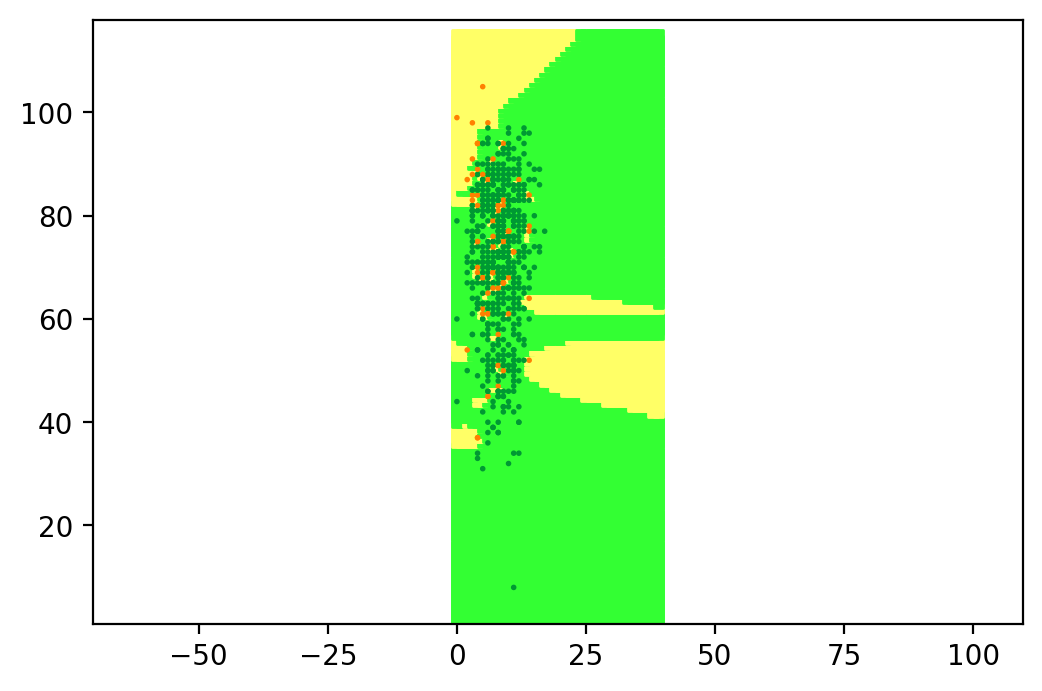

In [385]:
x, y = np.arange(0, sizeX), np.arange(0, sizeY)
X, Y = np.meshgrid(x, y)

colors = list(classTable.flatten())
green = np.array([51, 255, 51])
dark_green = np.array([0, 153, 51])
blue = np.array([0, 0, 128])
grey = np.array([128, 128, 128])
yellow = np.array([255, 255, 102])
for i in range(len(colors)):
  if colors[i] == 0:
    colors[i] = green / 255.0
  elif colors[i] == 1:
    colors[i] = yellow / 255.0
  else:
    colors[i] = grey / 255.0

plt.axis('equal')
plt.scatter(X, Y, c=colors, s=11, marker='s')

orange = np.array([255, 128, 0])

orig_colors = [list()] * len(featureX)
classZ = list(classZ)
for i in range(len(classZ)):
  orig_colors[i] = orange / 255.0 if classZ[i] == 1 else dark_green / 255.0

plt.scatter(featureX, featureY, c=orig_colors, s=1, marker='o')

delta = 3
plt.axis([xmin-delta, xmax+delta, ymin-delta, ymax+delta])
plt.rcParams['figure.dpi'] = 200
plt.show()

In [386]:
predZ = []
for i, val in testX.items():
    x, y = testX[i], testY[i]
    predZ.append(classTable[y, x])

In [387]:
accuracy_score(predZ, testZ)

0.7958904109589041